In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

**Importar Librerías**

---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#!pip install nltk

---

**Función para cargar los archivos CSV**

---

In [4]:
import csv
#Crea la lista vacía para almacenar el csv
filas = []

# Abre el archivo en modo lectura
with open('/content/drive/MyDrive/P_I_1/CSVs/CSV_ETL/data_reviews_etl.csv', 'r') as archivo_csv:
    # Crea un objeto lector CSV
    lector_csv = csv.reader(archivo_csv)
    encabezados = next(lector_csv)
    # Itera sobre las filas del archivo CSV
    for fila in lector_csv:
        filas.append(fila)

# Transpone la lista de filas para convertirla en columnas
data_reviews = pd.DataFrame(filas, columns=encabezados)

# Muestra el DataFrame
data_reviews.head()


,user_id,user_url,posted,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,Posted February 3.,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,"Posted October 14, 2013.",250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,"Posted April 15, 2014.",211420,35 of 43 people (81%) found this review helpful,True,Git gud


In [5]:
import pandas as pd
from textblob import TextBlob

# Supongamos que 'data_reviews' es tu DataFrame original
# Crear la columna 'sentiment_analysis' basada en el análisis de sentimiento
def analyze_sentiment(text):
    if pd.isnull(text):  # Si la reseña es nula, asignar 1 (neutral)
        return 1
    else:
        polarity = TextBlob(str(text)).sentiment.polarity
        if polarity < 0:
            return 0  # Malo
        elif polarity == 0:
            return 1  # Neutral
        else:
            return 2  # Positivo

data_reviews['sentiment_analysis'] = data_reviews['review'].apply(analyze_sentiment)

# Reemplazar la columna 'review' con 'sentiment_analysis'
#data_reviews['review'] = data_reviews['sentiment_analysis']

# Mostrar las primeras filas del DataFrame resultante
print(data_reviews.head())

             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
2          evcentric             http://steamcommunity.com/id/evcentric   
3              doctr                 http://steamcommunity.com/id/doctr   
4          maplemage             http://steamcommunity.com/id/maplemage   

                     posted item_id  \
0  Posted November 5, 2011.    1250   
1     Posted June 24, 2014.  251610   
2        Posted February 3.  248820   
3  Posted October 14, 2013.  250320   
4    Posted April 15, 2014.  211420   

                                           helpful recommend  \
0                                   No ratings yet      True   
1  15 of 20 people (75%) found this review helpful      True   
2                                   No ratings yet      True   
3   2 of 2 people (100%) found this review helpful      Tr

In [6]:
data_reviews.drop('review', axis=1, inplace=True)

In [7]:
data_reviews.head()

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,2
2,evcentric,http://steamcommunity.com/id/evcentric,Posted February 3.,248820,No ratings yet,True,2
3,doctr,http://steamcommunity.com/id/doctr,"Posted October 14, 2013.",250320,2 of 2 people (100%) found this review helpful,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,"Posted April 15, 2014.",211420,35 of 43 people (81%) found this review helpful,True,1


In [8]:
data_reviews_copy = data_reviews[['recommend', 'sentiment_analysis']].copy()

In [9]:
data_reviews_copy.head()

,recommend,sentiment_analysis
0,True,2
1,True,2
2,True,2
3,True,2
4,True,1


In [10]:
data_reviews_copy.value_counts()

recommend  sentiment_analysis
True       2                     31550
           1                     12301
           0                     11981
dtype: int64

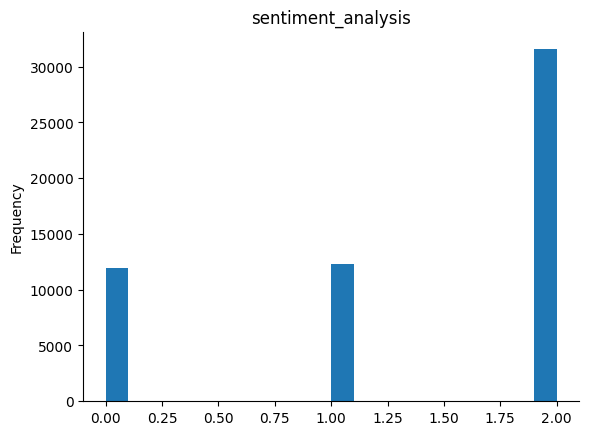

In [11]:
data_reviews_copy['sentiment_analysis'].plot(kind='hist', bins=20, title='sentiment_analysis')
plt.gca().spines[['top', 'right',]].set_visible(False)

---

**Modelo de Recomendación**

def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.

---


In [34]:
import pandas as pd
import string
import re

df= pd.read_csv('/content/drive/MyDrive/P_I_1/CSVs/CSV_ETL/data_games_etl.csv')

In [36]:
#Creamos Dataframe con las columnas que se utilizaran
df = df [['app_name', 'tags']]

In [37]:
# Imprimir la forma del DataFrame (filas, columnas)
print(df.shape)

(30738, 2)


In [38]:
# Tomar una muestra aleatoria del 0.2% del DataFrame
df = df.sample(frac=0.2, random_state=1234)

In [39]:
# Restablecer el índice del DataFrame
df = df.reset_index(drop=True)

# Imprimir las primeras 5 etiquetas
print(df['tags'].head())

0                                           ['Action']
1              ['RPG', 'Indie', 'Casual', 'Adventure']
2                              ['Indie', 'Simulation']
3    ['Open World', 'Action', 'Sandbox', 'Character...
4    ['Simulation', 'Action', 'Indie', 'Casual', 'VR']
Name: tags, dtype: object


In [40]:
# Eliminar puntuación de las etiquetas
df['ntags'] = df['tags'].str.replace('[{}]'.format(string.punctuation), '')

# Imprimir las primeras 5 etiquetas sin puntuación
print(df['ntags'].head())

0                                               Action
1                           RPG Indie Casual Adventure
2                                     Indie Simulation
3    Open World Action Sandbox Character Customizat...
4                    Simulation Action Indie Casual VR
Name: ntags, dtype: object


<ipython-input-40-382623815988>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ntags'] = df['tags'].str.replace('[{}]'.format(string.punctuation), '')


In [41]:
df.drop(['tags'], axis=1, inplace=True)

In [42]:
# Exportar Parquet

#Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_parquet = 'df_recomendacion_juego.parquet'
ruta_guardado = '/content/drive/MyDrive/P_I_1/CSVs/CSV_API/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_parquet

# Exporta el DataFrame a un archivo parquet
df.to_parquet(ruta_completa, engine='pyarrow')

# Imprime un mensaje de confirmación
print(f"DataFrame exportado exitosamente en formato parquet a: {ruta_completa}")

DataFrame exportado exitosamente en formato parquet a: /content/drive/MyDrive/P_I_1/CSVs/CSV_API/df_recomendacion_juego.parquet


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear una instancia de TfidfVectorizer con stop words en inglés
tfidf = TfidfVectorizer(stop_words='english')

# Rellenar los valores nulos en la columna 'ntags' con una cadena vacía
df['ntags'] = df['ntags'].fillna('')

# Aplicar la transformación TF-IDF a los datos de la columna 'ntags'
tfidf_matrix = tfidf.fit_transform(df['ntags'])

# Imprimir la longitud del vocabulario
print(len(tfidf.vocabulary_))

# Imprimir la forma de la matriz TF-IDF
print(tfidf_matrix.shape)


364
(6148, 364)


In [45]:
from sklearn.metrics.pairwise import linear_kernel

# Calcular la similitud del coseno utilizando el producto escalar lineal (linear_kernel)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Crear una serie de índices utilizando el nombre de la aplicación ('app_name') como índice
indices = pd.Series(df.index, index=df['app_name']).drop_duplicates()

In [51]:
#creamos la funcion
def get_recommendations(title, cosine_sim):
    """
    Obtiene recomendaciones para un juego dado

    Parámetros:
      title: El título del juego
      cosine_sim: La matriz de similitud coseno

    Devuelve:
      Una lista de títulos de juegos recomendados
    """

    try:
        # Obtener el índice del juego en la matriz de similitud coseno
        idx = indices[title]

        # Obtener las puntuaciones de similitud para el juego
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordenar las puntuaciones de similitud por orden descendente
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtener los índices de los 5 juegos más similares
        game_indices = [i[0] for i in sim_scores[1:6]]

        # Obtener los títulos de los 5 juegos más similares
        recommendations = df['app_name'].iloc[game_indices]

        # Imprimir las recomendaciones
        print('Para el juego:', title, '\nLas recomendaciones son:\n', recommendations)

    except KeyError:
        print('El juego', title, 'no se encuentra en el DataFrame.')



In [52]:
# Imprimir las primeras 5 etiquetas sin puntuación
print(df['app_name'])

0             Call of Duty®: Ghosts - Weapon - The Ripper
1                                           Antiquia Lost
2        Euro Truck Simulator 2 - Swedish Paint Jobs Pack
3                                            Saints Row 2
4                                            Gun Range VR
                              ...                        
6143              Europa Universalis: Rome - Gold Edition
6144    RPG Maker MV - Call of Darkness: Japanese Reso...
6145    Fantasy Grounds - Return to Freeport, Part One...
6146                                        Jettomero OST
6147                         Nandeyanen!? - The 1st Sûtra
Name: app_name, Length: 6148, dtype: object


In [53]:
get_recommendations('Saints Row 2', cosine_sim)

Para el juego: Saints Row 2 
Las recomendaciones son:
 3713                     Saints Row: The Third
5837                          Orcs Must Die! 2
1850               Saints Row: Gat out of Hell
5296                              GOCCO OF WAR
865     Earth Defense Force: Insect Armageddon
Name: app_name, dtype: object


Si es un sistema de recomendación user-item:
def recomendacion_usuario( id de usuario ): Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.